In [1]:
from __future__ import print_function

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df = pd.read_csv('cleaned_transactions.csv')

In [4]:
df[['StockCode', 'Description']].head(10)

,StockCode,Description
0,22728,ALARM CLOCK BAKELIKE PINK
1,22727,ALARM CLOCK BAKELIKE RED
2,22726,ALARM CLOCK BAKELIKE GREEN
3,21724,PANDA AND BUNNIES STICKER SHEET
4,21883,STARS GIFT TAPE
5,10002,INFLATABLE POLITICAL GLOBE
6,21791,VINTAGE HEADS AND TAILS CARD GAME
7,21035,SET/2 RED RETROSPOT TEA TOWELS
8,22326,ROUND SNACK BOXES SET OF4 WOODLAND
9,22629,SPACEBOY LUNCH BOX


In [6]:
len(df.StockCode.unique())

2574

We want to take into account the item specific data, i.e. what items do the customer purchased.
But there are too many of these items, we can't directly use dummy variables for each one of these. 
Need some kind of dimensionality reduction.

In [7]:
item_dummies = pd.get_dummies(df.StockCode)

item_dummies['CustomerID'] = df.CustomerID

item_dummies.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST,CustomerID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583


In [8]:
item_data = item_dummies.groupby('CustomerID').sum()

In [9]:
item_data.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,5


In [10]:
item_data.sum()

10002        12
10120         1
10125        13
10133         5
10135         4
11001         8
15034         5
15036        19
15039         3
15044A        6
15044B        3
15044C        2
15044D        4
15056BL      50
15056N       35
15056P       24
15058A        9
15058B        8
15058C        4
15060B       12
16008        11
16011         3
16012         4
16014        10
16016        16
16045         8
16048         8
16054         2
16156L        6
16156S       12
           ... 
90098         1
90099         2
90108         1
90114         1
90120B        1
90145         2
90160A        1
90160B        1
90160C        1
90160D        1
90161B        1
90161C        1
90161D        1
90162A        1
90162B        1
90164A        1
90170         1
90173         1
90184B        1
90184C        1
90192         1
90201A        1
90201B        3
90201C        2
90201D        1
90202D        1
90204         1
C2            6
M            34
POST       1055
Length: 2574, dtype: int

## Threshold based feature elimination
#### Lets see popular items

In [14]:
item_data.sum().sort_values()[item_data.sum()>100]

21086      101
23206      103
22352      104
22727      104
22138      104
22720      104
21559      106
22728      108
22555      109
20724      110
20712      110
22961      114
22630      115
22139      117
21080      122
85099B     123
20726      123
20719      128
20750      132
23084      140
20725      141
21212      143
22551      158
22629      160
22328      166
21731      169
22556      179
22554      197
22423      222
22326      271
POST      1055
dtype: int64

### keep only popular items

In [15]:
top_items = item_data.sum().sort_values()[item_data.sum()>100].index

In [16]:
top_items

Index([u'21086', u'23206', u'22352', u'22727', u'22138', u'22720', u'21559',
       u'22728', u'22555', u'20724', u'20712', u'22961', u'22630', u'22139',
       u'21080', u'85099B', u'20726', u'20719', u'20750', u'23084', u'20725',
       u'21212', u'22551', u'22629', u'22328', u'21731', u'22556', u'22554',
       u'22423', u'22326', u'POST'],
      dtype='object')

In [17]:
top_item_data = item_data[top_items]

In [18]:
top_item_data.head()

,21086,23206,22352,22727,22138,22720,21559,22728,22555,20724,...,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,5,0,0,0,3,0,0,...,0,0,0,0,5,0,0,4,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,1,1,1,1
12350,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
12352,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,1,0,0,2,0,5


In [37]:
top_item_data.to_csv('threshold_item_data.csv')

## PCA

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
scaler = StandardScaler()
item_data_scaled = scaler.fit_transform(item_data)
item_data_scaled[:5]

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])

In [26]:
pca= PCA()
pca.fit(item_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
PC_items = pca.transform(item_data_scaled)

In [28]:
PC_items[:5]

array([[  5.87614052e+00,   4.82891689e+00,  -4.95545069e-01, ...,
         -6.62646278e-04,  -4.43629806e-05,   3.41393580e-15],
       [ -4.21983747e+00,   1.22621722e+00,  -1.88191211e+00, ...,
         -2.11471782e-04,  -2.69154340e-04,  -3.15372728e-15],
       [ -1.26084676e+00,   2.38766371e+00,  -7.31483440e-02, ...,
          2.57750179e-04,  -2.05682324e-04,  -6.81746326e-16],
       [ -4.92931983e+00,  -7.14858724e-01,  -1.58093026e+00, ...,
         -1.98603886e-03,   9.92316312e-05,  -1.44155521e-15],
       [ -2.05311348e+00,   2.11095022e+00,   1.84807021e-01, ...,
         -3.43415269e-04,  -1.32981672e-04,   4.44089210e-15]])

### cumulative explained variance

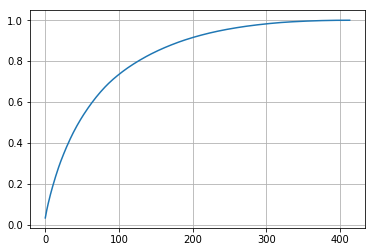

In [30]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.grid(True)
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

#### lets try to keep around 80% variance

In [32]:
cumulative_explained_variance[129]

0.80631786544972683

### So, keep 130 top features using PCA

In [33]:
pca = PCA(n_components=130)
PC_items = pca.fit_transform(item_data_scaled)
PC_items.shape

(414, 130)

In [34]:
items_pca = pd.DataFrame(PC_items)

In [35]:
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]
items_pca.index = item_data.index
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,5.876142,4.828928,-0.495552,3.093860,-0.633695,-11.534111,2.161991,7.116966,5.336054,4.424455,...,0.617942,0.620406,-0.257790,0.592536,-0.173065,-0.499284,0.475380,-0.068648,0.236544,0.636234
12348,-4.219831,1.226259,-1.881888,-0.174246,0.817945,1.160769,-0.871659,-0.846210,0.460265,0.854154,...,0.429856,-0.574109,-0.919167,-0.350570,-1.120047,0.742861,-0.875401,-1.138092,0.907499,-0.296269
12349,-1.260838,2.387704,-0.073051,-1.119292,-0.034623,-3.715211,-0.343776,-0.149623,-0.789513,-0.378788,...,-0.572540,1.399162,-3.128503,1.244966,-4.038387,-4.204556,6.178445,1.899059,-5.164789,0.828374
12350,-4.929319,-0.714871,-1.580819,-0.469883,-0.116420,0.647845,0.113066,-1.336656,1.547095,-1.190784,...,-0.572305,0.234113,0.726583,-1.280786,-0.501006,-0.210785,0.495302,-0.739222,-0.212180,1.682187
12352,-2.053117,2.111166,0.184604,0.128511,0.087685,-1.943646,2.383234,0.899918,-0.671258,0.080690,...,-0.977290,6.625053,2.008473,-2.231867,1.640222,-1.397512,-3.820568,-1.148290,-4.764419,-0.856397


In [36]:
items_pca.to_csv('pca_item_data.csv')


#### lets keep 30 top features using PCA (similar to threshold)

In [42]:
cumulative_explained_variance[29]

0.38101160843100779

In [43]:
pca = PCA(n_components=30)
PC_items = pca.fit_transform(item_data_scaled)
PC_items.shape

(414, 30)

In [44]:
items_pca = pd.DataFrame(PC_items)
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]
items_pca.index = item_data.index
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,5.876274,4.831762,-0.499925,3.090107,-0.632973,-11.507102,2.095410,7.139219,5.163391,4.435603,...,-5.709662,8.047806,41.283714,-37.394419,-15.629249,7.792009,19.995146,6.662616,-22.762139,-33.688975
12348,-4.219832,1.226449,-1.882079,-0.174349,0.818221,1.161471,-0.875934,-0.848576,0.455719,0.851600,...,0.175831,0.037665,0.498985,0.301980,1.333156,-0.678253,-0.069919,1.025139,-0.106025,-0.007098
12349,-1.260826,2.388205,-0.072671,-1.118594,-0.037437,-3.714239,-0.338502,-0.145777,-0.798898,-0.404677,...,-0.548188,0.428412,-0.685355,1.549563,-1.581893,0.230518,-0.890377,0.940356,0.836539,-1.137101
12350,-4.929325,-0.714888,-1.581164,-0.469973,-0.115040,0.648770,0.104595,-1.337890,1.540977,-1.178559,...,-0.110929,0.894924,1.358928,0.203494,-0.193021,-0.195534,-0.561222,1.252332,0.051633,-0.183793
12352,-2.053136,2.110795,0.185076,0.129358,0.088341,-1.944924,2.402490,0.890903,-0.654955,0.081365,...,-0.683599,-0.950596,-2.248489,0.661647,-2.082930,-0.690487,-1.097586,-1.870677,-0.998540,0.555846


In [45]:
items_pca.to_csv('pca_item_data_short.csv')